In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from utils import *
import os
os.chdir(r"C:\Users\altrn\Documents\fifth_semester\PROJ\Anomaly-detection-in-timeseries")
from PROD.models.deviationClassifier import *
from PROD.models.featureClassifier import *
from PROD.models.lstmClassifier import *

## Data load

At first we will need to prepair the data. We have a csv file with all the signals. The columns of the csv file are:

idx, label, meas_id, Force_x, Force_y, Force_z, Torque_x, Torque_y, Torque_z

- idx is the identifier of the signal
- label is the boolean or None label of the signal
- meas_id is the identifier of the group of measurement (e.g. day of the measurement) in the form of an int 1 - n
- The other columns are signal feature columns


We create variables:

data, signals, labels, correct_signals, anom_signals

- data: list of tuples in the form of (signal : pd.DataFrame, label : bool)
- signals: list of signals in the form of pd.Dataframe
- labels: list of boolean/None labels
- correct_signals: list of signals with label "True"
- wrong_signals: list of signals with label "False"
- unlabeled_signals: list of signals with label "None"



In [2]:
data = load_data("./PROD/data/dataset.csv", id = [5])
signals = [i[0] for i in data]
labels = [i[1] for i in data]
correct_signals = [transform_pd_to_npy(i[0]) for i in data if i[1] == True]
anom_signals = [transform_pd_to_npy(i[0]) for i in data if i[1]==False]
unlabeled_signals = [transform_pd_to_npy(i[0]) for i in data if i[1] is None]
print("Number of correct: ", len(correct_signals), ", Number of anomalous: ", len(anom_signals))
print()
print("Number of signals:", len(data))
print()
print("Format of a signal:\n\n", data[0])

Number of correct:  30 , Number of anomalous:  30

Number of signals: 60

Format of a signal:

 (          Force_x  Force_y    Force_z  Torque_x  Torque_y  Torque_z
265914  22.672001    0.000  21.632000    -0.996     1.232     0.996
265915  21.840000    0.208  21.424000    -0.956     1.156     1.004
265916  21.840000    0.208  21.424000    -0.956     1.156     1.004
265917  21.632000    0.000  20.799999    -0.952     1.140     0.996
265918  21.632000    0.000  20.799999    -0.952     1.140     0.996
...           ...      ...        ...       ...       ...       ...
266922  19.552000    0.000  17.888000    -0.956     1.084     0.856
266923  19.552000    0.000  17.888000    -0.956     1.084     0.856
266924  19.760000    0.208  17.680000    -0.880     1.068     0.860
266925  20.176001   -0.208  17.680000    -0.824     1.088     0.876
266926  20.591999   -0.624  18.096001    -0.772     1.128     0.956

[1013 rows x 6 columns], False)


## Deviation classifier

The first type of a classifier is n-$\sigma$ classifier.

We can fit whole loaded dataset into the classifier

In [3]:
%matplotlib inline
std_class = deviationClassifier(6,3)
std_class.fit_whole_supervised_dataset(data)

Below we can see the parameters of the model. The black is the mean and blue range is the variance of normal signals. If the signal breaches this bound in given timestamp, the timestamp is marked as anomalous

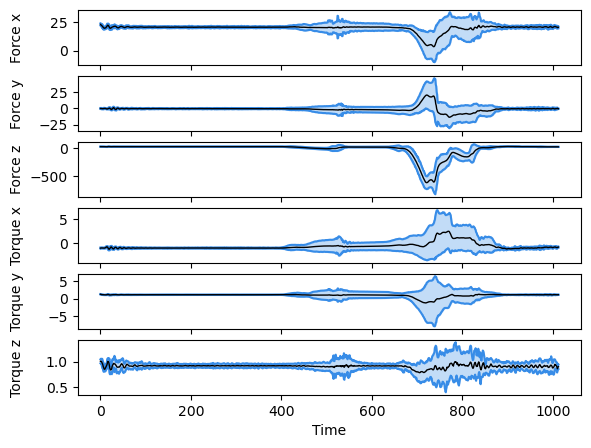

In [4]:
std_class.show_params()

This is how we predict a random signal.
The first chart is correct signal and the second is anomalous

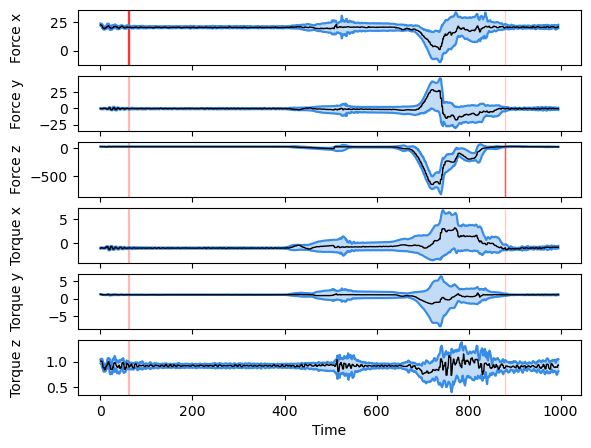

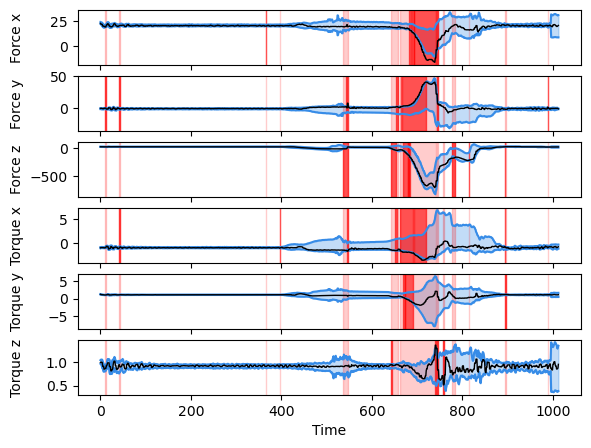

True

In [5]:
std_class.predict_full_signal(correct_signals[0])
std_class.predict_full_signal(anom_signals[0])

We can also make classification "online" from a segment of the signal

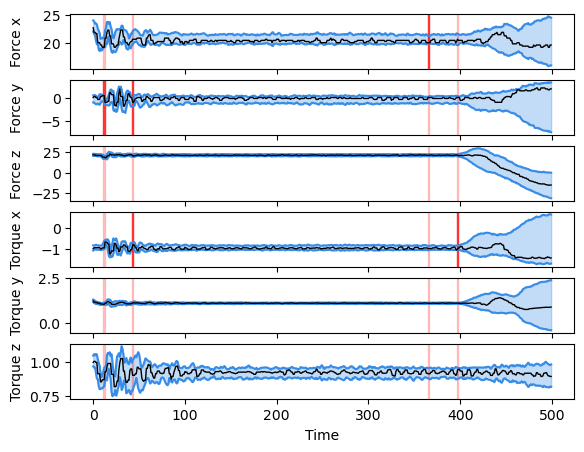

False

In [6]:
std_class.predict_partial_signal(data[0][0][:500])

Now we can save the trained model

In [7]:
std_class.save_params("deviationClassifier", "./PROD/model_params/")

## Feature classifier

Another classifier is the feature classifier. The training is not as straightforward and takes a bit of time so we can either train or use a pretrained model.

In [8]:
fk = featureClassifier()

Run the following cell to train the model (takes cca 30s on my PC).

## Warning

The following cell takes 30 seconds to execute (on my computer)

[[3565.0622239259187, 551.2106485749066], [5414.614248547392, 563.716141695243], [5782.063522970688, 515.4738522791066], [3331.8251354031504, 563.4921918711339], [6428.451922657775, 571.719535309252], [5490.26175740352, 688.7731944730356], [7037.794708792036, 1387.7893805751933], [3381.5494015205804, 567.0298735986757], [4866.921587078247, 532.398797901], [5292.298978027229, 567.4926614294876], [5328.198049044377, 687.384808803763], [5468.820862912709, 566.7554292542023], [3751.7076687089752, 501.02874217810205], [6133.290738414591, 624.2249964710329], [5693.727882747277, 1030.6442036189953], [5268.7031144969, 655.5245878836074], [3862.9923938812103, 541.1329750059091], [5148.487007107574, 628.6357025185287], [6016.565820741715, 1022.8133591960856], [5314.3146951260715, 594.7061474192788], [3882.4859478464837, 548.1102394975966], [5622.356783061191, 705.1493565272903], [5112.004160172699, 801.3935827401675], [4137.376928991954, 543.5457845896917], [5731.628993494927, 608.6058707708269]

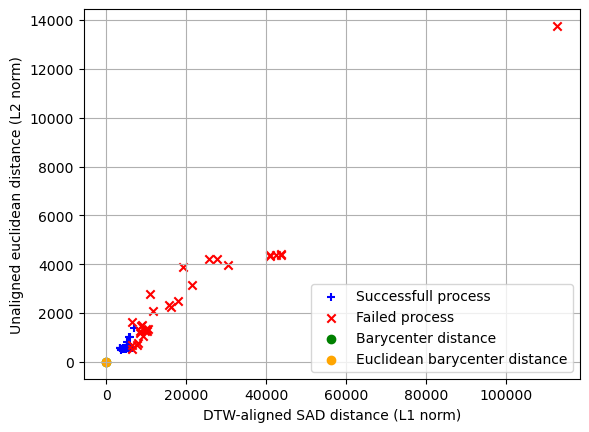

[[3565.0622239259187, 551.2106485749066], [5414.614248547392, 563.716141695243], [5782.063522970688, 515.4738522791066], [3331.8251354031504, 563.4921918711339], [6428.451922657775, 571.719535309252], [5490.26175740352, 688.7731944730356], [7037.794708792036, 1387.7893805751933], [3381.5494015205804, 567.0298735986757], [4866.921587078247, 532.398797901], [5292.298978027229, 567.4926614294876], [5328.198049044377, 687.384808803763], [5468.820862912709, 566.7554292542023], [3751.7076687089752, 501.02874217810205], [6133.290738414591, 624.2249964710329], [5693.727882747277, 1030.6442036189953], [5268.7031144969, 655.5245878836074], [3862.9923938812103, 541.1329750059091], [5148.487007107574, 628.6357025185287], [6016.565820741715, 1022.8133591960856], [5314.3146951260715, 594.7061474192788], [3882.4859478464837, 548.1102394975966], [5622.356783061191, 705.1493565272903], [5112.004160172699, 801.3935827401675], [4137.376928991954, 543.5457845896917], [5731.628993494927, 608.6058707708269]

In [9]:
fk.naive_fit(data, vis = True)

Run the following cell to load a pretrained model (with the same params as on the picture)

In [10]:
fk.load_params("./PROD/model_params/featureClassifier17042024.pkl")

In [11]:
fk.predict(correct_signals[0])

True

In [12]:
fk.predict(anom_signals[0])

False

## Warning

The following cell takes over a minute to execute (on my computer)

In [13]:
fk.online_fit(data[:10])

Computing signal 1 out of 7
Computing signal 2 out of 7


KeyboardInterrupt: 

In [ ]:
print("CORRECT SIGNALS:")
print("(Prediction| ground truth)")
for i in range(30):
    for length in range(100, 1001, 100):
        print(fk.predict_partial_signal(correct_signals[i][:length, :]), end=" ")
    print(f"({fk.predict_partial_signal(correct_signals[i][:length, :])}| True)", end= ";    ")
    if i%2==1:
        print()

CORRECT SIGNALS:
(Prediction| ground truth)
True True True True True True True True True True (True| True);    True True True True True True True True True True (True| True);    
True True True True True True True True True True (True| True);    True True True True True True True True True True (True| True);    
True True True True True True True True True True (True| True);    True True True True True True True True True True (True| True);    
True True True True True True False False False False (False| True);    True True True True True True True True True True (True| True);    
True True True True True True True True True True (True| True);    True True True True False False True True True True (True| True);    
True False False False True True True True True True (True| True);    True True False True False True True True True True (True| True);    
True True True True True True True True True True (True| True);    True True True True True True True True True True (True| True);    

In [ ]:
print("WRONG SIGNALS:")
print("(Prediction| ground truth)")
for i in range(30):
    for length in range(100, 1001, 100):
        print(fk.predict_partial_signal(anom_signals[i][:length, :]), end=" ")
    print(f"({fk.predict_partial_signal(anom_signals[i][:length, :])}| False)", end= ";    ")
    if i%2==1:
        print()

WRONG SIGNALS:
(Prediction| ground truth)
True True True True True False False False False False (False| False);    True True True True True True True True True True (True| False);    
True True True True True True False False False False (False| False);    True True True True True True True True False False (False| False);    
True True True True False True True False False False (False| False);    True False False False False False True True True True (True| False);    
True True True True True False False False False False (False| False);    True True True True True False False False False False (False| False);    
True True True True True False False False False False (False| False);    True True True True True False False False False False (False| False);    
True True True True True False True False False False (False| False);    True True True True True False False False False False (False| False);    
True True True True True False False False False False (False| False);    Tru

Now we can save the params

In [ ]:
fk.save_params("featureClassifier17042024", "./PROD/model_params/")

## Warning

The following cell takes over 7 minutes to execute (on my computer)

In [ ]:

err =fk.online_fit(data)

Completed signal 0 out of 30
Completed signal 1 out of 30
Completed signal 2 out of 30
Completed signal 3 out of 30
Completed signal 4 out of 30
Completed signal 5 out of 30
Completed signal 6 out of 30
Completed signal 7 out of 30
Completed signal 8 out of 30
Completed signal 9 out of 30
Completed signal 10 out of 30
Completed signal 11 out of 30
Completed signal 12 out of 30
Completed signal 13 out of 30
Completed signal 14 out of 30
Completed signal 15 out of 30
Completed signal 16 out of 30
Completed signal 17 out of 30
Completed signal 18 out of 30
Completed signal 19 out of 30
Completed signal 20 out of 30
Completed signal 21 out of 30
Completed signal 22 out of 30
Completed signal 23 out of 30
Completed signal 24 out of 30
Completed signal 25 out of 30
Completed signal 26 out of 30
Completed signal 27 out of 30
Completed signal 28 out of 30
Completed signal 29 out of 30


## LSTM classifier

The training for this classifier takes a very long time (30 min on my computer), so the weights for the model are provided. These can be loaded directly by running the following cell. The training is done using the method train_classifier().

In [ ]:
model = lstmClassifier.load_from_checkpoint(checkpoint_path = "./PROD/model_params/lstm_offline_weights.ckpt",
                                         n_features = 6, n_classes = 2)

In [ ]:
print("CORRECT SIGNALS:")
print("(Prediction| ground truth)")
for i in range(30):
    print(f"({model.predict(correct_signals[i])}| True)", end =" ")
    if i%5==4:
        print()

print("\n\n\nWRONG SIGNALS:")
print("(Prediction| ground truth)")
for i in range(30):
    print(f"({model.predict(anom_signals[i])}| False)", end =" ")
    if i%5==4:
        print()

CORRECT SIGNALS:
(Prediction| ground truth)
(True| True) (True| True) (True| True) (True| True) (True| True) 
(True| True) (True| True) (True| True) (True| True) (True| True) 
(True| True) (True| True) (True| True) (True| True) (True| True) 
(True| True) (True| True) (True| True) (True| True) (True| True) 
(True| True) (True| True) (True| True) (True| True) (True| True) 
(True| True) (True| True) (True| True) (True| True) (True| True) 



WRONG SIGNALS:
(Prediction| ground truth)
(False| False) (True| False) (False| False) (False| False) (True| False) 
(True| False) (False| False) (True| False) (False| False) (False| False) 
(True| False) (True| False) (False| False) (False| False) (True| False) 
(False| False) (False| False) (False| False) (True| False) (False| False) 
(False| False) (False| False) (False| False) (False| False) (False| False) 
(False| False) (False| False) (False| False) (False| False) (False| False) 


# This is the end of the presentation after this there are only cells for testing purposes

In [ ]:
%matplotlib qt
lab = ["dtw", "euclid"]
with open("./PROD/err.pkl", 'wb') as f:
    pickle.dump(err, f)
dtw_err, euclid_err = err
for i in range(30):
    signal_len = 1013
    xaxis = np.arange(signal_len)
    plt.plot(xaxis, dtw_err[i], color = "red")
    plt.plot(xaxis, euclid_err[i], color = "blue")
plt.legend(lab)
plt.show()

[1 3 6]


In [ ]:
with open("./PROD/err_cor.pkl", 'rb') as f:
    load = pickle.load(f)
dtw_err_, euclid_err_ = load
dtw_err_ = [np.cumsum(i)/np.cumsum(i)[-1] for i in dtw_err]
euclid_err_ = [np.cumsum(i)/np.cumsum(i)[-1] for i in euclid_err]
plt.subplot(1,3,1)
for i in range(30):
    signal_len = 1013
    xaxis = np.arange(signal_len)
    plt.plot(xaxis, dtw_err_[i], color = "red")
    plt.plot(xaxis, euclid_err_[i], color = "blue")
plt.legend(lab)
plt.subplot(1,3,2)
dtw_err_ = [i/max(i) for i in dtw_err]
euclid_err_ = [i/max(i) for i in euclid_err]
for i in range(30):
    signal_len = 1013
    xaxis = np.arange(signal_len)
    plt.plot(xaxis, dtw_err_[i], color = "red")
    plt.plot(xaxis, euclid_err_[i], color = "blue")
plt.legend(lab)
plt.subplot(1,3,3)
dtw_err_ = [max(i)/(i+100) for i in dtw_err]
euclid_err_ = [max(i)/(i+100) for i in euclid_err]
for i in range(30):
    signal_len = 1013
    xaxis = np.arange(signal_len)
    plt.plot(xaxis, dtw_err_[i], color = "red")
    plt.plot(xaxis, euclid_err_[i], color = "blue")
plt.legend(lab)
plt.show()

In [ ]:
data = load_data("./../data_to_load/6dimdefault/CSV/dataset.csv")
std_class = deviationClassifier(6,3)
std_class.fit_incremental_dataset(data, vis=True)

In [ ]:
std_class.show_params()

In [ ]:
%matplotlib inline
std_class.predict_full_signal(correct_signals[0], save_fig= "norm_signal.pdf")

In [ ]:
plot_6dim_signal_dataset(data)

In [ ]:
cumsum = 0
sigs = correct_signals
for i in range(len(sigs)):
    cumsum += model.predict(sigs[i])
cumsum, len(sigs)

(238, 244)

In [ ]:
model_ = lstmClassifier(6,2)
model_.train_classifier(data, 2, 2)

INFO: Preprocessing training data!


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\altrn\anaconda3\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:653: Checkpoint directory C:\Users\altrn\Documents\fifth_semester\PROJ\Anomaly-detection-in-timeseries\checkpoints exists and is not empty.

  | Name      | Type               | Params
-------------------------------------------------
0 | model     | LSTMModule         | 1.3 M 
1 | criterion | CrossEntropyLoss   | 0     
2 | accuracy  | MulticlassAccuracy | 0     
-------------------------------------------------
1.3 M     Trainable params
0         Non-trainable params
1.3 M     Total params
5.294     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]